# GRIP TASK 2.1 - SUPERVISED LINEAR REGRESSION MODEL

# AUTHOR - PIRAVIN KANTH R

In [1]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#LOAD THE DATA FILE
link="http://bit.ly/w-data"
df=pd.read_csv(link)
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#CHECK THE INFO OF THE DATA LOADED
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#DESCRIPTIVE UNDERSTANDING OF DATA
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#CHECKING THE LINEAR RELATIONSHIP BETWEEN VARIABLES
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# PROBLEM STATEMENT GIVEN: PREDICT THE SCORE FOR A STUDENT STUDYING 9.25hrs ON AVG.

In [6]:
#SETTING UP THE INDEPENDENT AND DEPENDENT VARIABLES
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

In [7]:
#SPLIT THE DATA FOR TRAIN AND TEST
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.8, random_state=42) 

In [8]:
#PERFORMING LINEAR REGRESSION
reg = LinearRegression()  
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print("The R square for train data is" ,reg.score(X_train, Y_train))

The R square for train data is 0.9491209376364417


In [10]:
reg.coef_

array([9.68207815])

In [11]:
reg.intercept_

2.826892353899737

In [12]:
#EQUATION:- Scores = 2.826892353899737 + (9.68207815 * Hours)

In [13]:
#IMPOSING THE MODEL ON TEST DATA
Y_pred = reg.predict(X_test)

In [14]:
mod = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
mod

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 3.9207511902099244


In [16]:
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(Y_pred,Y_test)))

Root Mean Square Error: 4.352380006653288


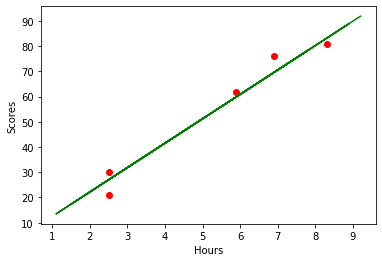

In [17]:
#VISUALIZING THE TEST DATA WITH THE MODEL TREND LINE
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, reg.predict(X_train), color = 'green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [18]:
#PREDICTING FOR DESIRED VALUE
hours = 9.25
score = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


# GIVEN TASK COMPLETED

# OWN PROBLEM STATEMENT: PREDICT THE TIME A STUDENT NEED TO STUDY ON AVG TO GET A PASS MARK i.e., 40 MARKS (ASSUMED PASS MARK) 

In [19]:
#SETTING UP THE INDEPENDENT AND DEPENDENT VARIABLES
B = df.iloc[:, :-1].values  
A = df.iloc[:, 1].values

In [20]:
#SPLIT THE DATA FOR TRAIN AND TEST
A_train, A_test, B_train, B_test = train_test_split(A, B,train_size=0.8, random_state=42) 

In [21]:
#RESHAPING THE ARRAY TO AVOID VALUE ERROR
A_train=np.reshape(A_train,(20,1))
A_test=np.reshape(A_test,(5,1))

In [22]:
#RESHAPING THE ARRAY TO AVOID VALUE ERROR
B_train=np.reshape(B_train,(20,1))
B_test=np.reshape(B_test,(5,1))

In [23]:
#PERFORMING LINEAR REGRESSION
reg1 = LinearRegression()  
reg1.fit(A_train,B_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print("The R square for train data is" ,reg1.score(A_train, B_train))

The R square for train data is 0.9491209376364416


In [25]:
reg1.coef_

array([[0.09802864]])

In [26]:
reg1.intercept_

array([-0.02475626])

In [27]:
#EQUATION:- Hours = (-0.02475626 + 0.09802864 * Scores)

In [28]:
#IMPOSING THE MODEL ON TEST DATA
B_pred = reg1.predict(A_test)

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(B_test, B_pred))

Mean Absolute Error: 0.3890267741244121


In [30]:
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(B_pred,B_test)))

Root Mean Square Error: 0.4093201150282972


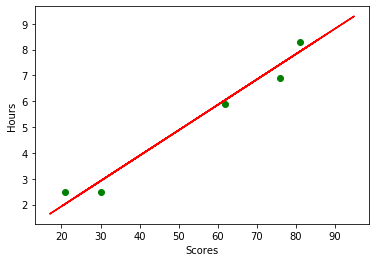

In [31]:
#VISUALIZING THE TEST DATA WITH THE MODEL TREND LINE
plt.scatter(A_test, B_test, color = 'green')
plt.plot(A_train, reg1.predict(A_train), color = 'red')
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.show()

In [32]:
#PREDICTING FOR DESIRED VALUE
mark = 40
hour = reg1.predict([[mark]])
print("Score aimed = {}".format(mark))
print("Required time = {}".format(np.round(hour[0],2)))

Score aimed = 40
Required time = [3.9]


# TASK COMPLETED